In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# creating weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

# Create a nice looking graph of the political blog network

C:\Users\Megha Sogani\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


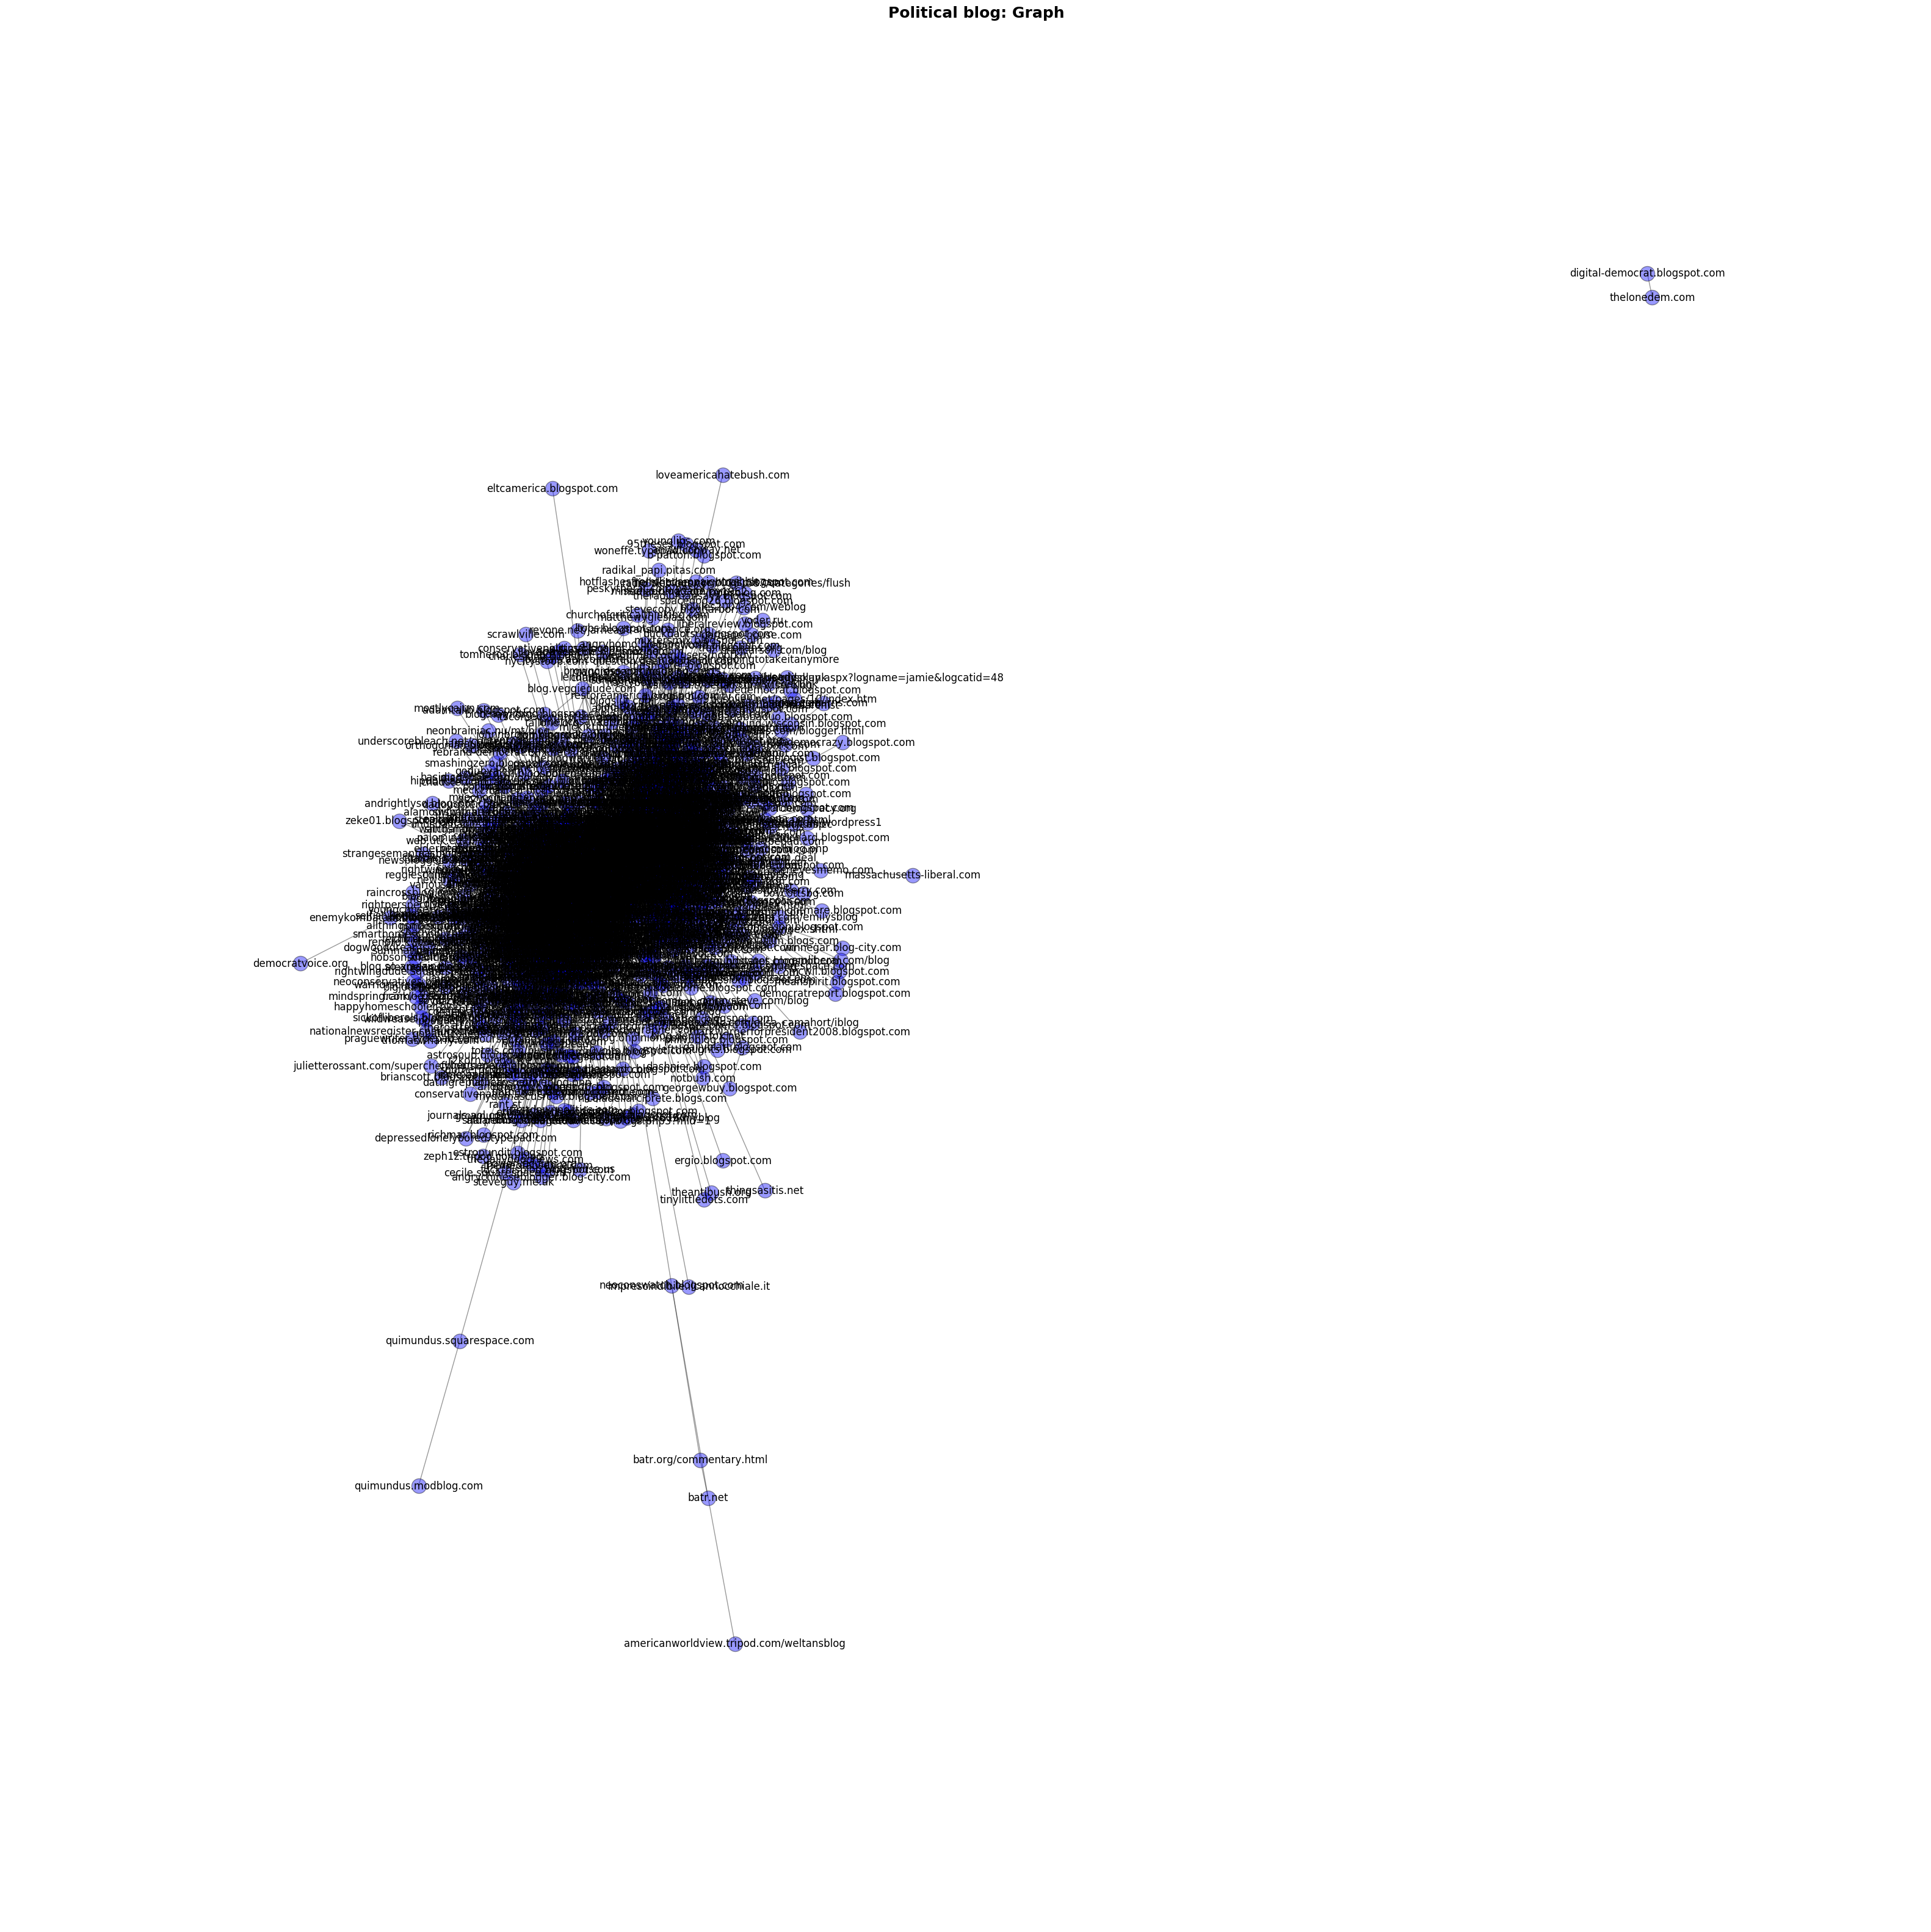

In [4]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 18}
plt.title("Political blog: Graph", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

# What are the 10 most influential blogs?

In [5]:
centrality=nx.eigenvector_centrality(G)

In [6]:
blogs_list = []
for node in centrality:
    blogs_list.append((node,centrality[node]))
    
sorted_blogs_list = blogs_list.sort(key=lambda x: x[1])

In [7]:
most_influentialblogs=sorted(blogs_list, key=lambda x: x[1], reverse=True)
most_influentialblogs[0:10]

[(u'atrios.blogspot.com', 0.1948079793663771),
 (u'dailykos.com', 0.1608974020523483),
 (u'washingtonmonthly.com', 0.14653924259836879),
 (u'digbysblog.blogspot.com', 0.14264369221718312),
 (u'bodyandsoul.typepad.com', 0.1411348917433036),
 (u'liberaloasis.com', 0.1395237157110787),
 (u'tbogg.blogspot.com', 0.13703641699824257),
 (u'corrente.blogspot.com', 0.12941759274096148),
 (u'talkingpointsmemo.com', 0.12700519780790953),
 (u'dneiwert.blogspot.com', 0.1223756469254602)]

# What are the 10 least influential blogs?

In [8]:
least_influentialblogs=sorted(blogs_list, key=lambda x: x[1], reverse=False)
least_influentialblogs[0:10]

[(u'thelonedem.com', 1.7763251097559663e-72),
 (u'digital-democrat.blogspot.com', 1.7763251097559663e-72),
 (u'americanworldview.tripod.com/weltansblog', 7.491540638916242e-09),
 (u'quimundus.modblog.com', 6.682929975006484e-08),
 (u'batr.org/commentary.html', 6.795517611554005e-07),
 (u'batr.net', 6.79632559492946e-07),
 (u'democratvoice.org', 1.02333882041133e-06),
 (u'quimundus.squarespace.com', 6.061741218869531e-06),
 (u'massachusetts-liberal.com', 9.483365235734505e-06),
 (u'thingsasitis.net', 1.1736249650658611e-05)]